CASE STUDY: YAKUB TRADING GROUP - ALGORITHMIC STAFF PROMOTION
Abdullah’s Baba Yakub, 38, is the heir apparent to the highly revered Yakub business dynasty. The enterprise has spanned decades with vast investment interest in all the various sectors of the economy.

Abdullah has worked for 16 years in Europe and America after his first and second degrees at Harvard University where he studied Engineering and Business Management. He is a very experienced technocrat and a global business leader who rose through the rank to become a Senior Vice President at a leading US business conglomerate. His dad is now 70 and has invited him to take over the company with a mandate to take it to the next level of growth as a sustainable legacy. Abdullah is trusted by his father and his siblings to lead this mandate.

On resumption, he had an open house with the staff to share his vision and to listen to them on how to take the business to the next level. Beyond the general operational issues and increasing need for regulatory compliance, one of the issues raised by the staff was a general concern on the process of staff promotion. Many of the staff allege that it is skewed and biased. Abdullah understood the concern and promised to address it in a most scientific way.

You have been called in by Abdullah to use your machine learning skills to study the pattern of promotion. With this insight, he can understand the important features among available features that can be used to predict promotion eligibility.

The dataset contains these variables as explained below: 

• EmployeeNo : System-generated unique staff ID

• Division: Operational department where each employee works

• Qualification: Highest qualification received by the staff

• Gender: Male or Female

• Channel_of_Recruitment: How the staff was recruited – this is via internal process, use of an agent or special referral

• Trainings_Attended : Unique paid and unpaid trainings attended by each staff in the previous business cycle

• Year_of_birth: Year that the employee was born

• Last_Performance_Score Previous year overall performance HR score and rated on a scale of 0-14

• Year_of_recruitment : The year that each staff was recruited into the company

• Targets_met: A measure of employees who meet the annual set target. If met, the staff scores 1 but if not, it is a 0.

• Previous_Award : An indicator of previous award won. If yes, it is a 1 and if No it is a 0.

• Training_score_average: Feedback score on training attended based on evaluation

• State_Of_Origin: The state that the employee claims

• Foreign_schooled: An indicator of staff who had any of their post-secondary education outside the country. Responses are in Yes or No

• Marital_Status: Marriage status of employees and recorded as Yes or No

• Past_Disciplinary_Action : An indicator if a staff has been summoned to a disciplinary panel in the past. This is indicated as Yes or No

• Previous_IntraDepartmental_Movement : This is an indicator to identify staff who have moved between departments in the past. Yes and No are the responses.

• No_of_previous_employers : A list of the number of companies that an employee worked with before joining the organisation. This is recorded as counts

IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os

In [4]:
train = pd.read_csv('/content/drive/My Drive/train.csv')  #Importing my datasets from my GoogleDrive
test = pd.read_csv('/content/drive/My Drive/test.csv')

VISUALIZATIONS

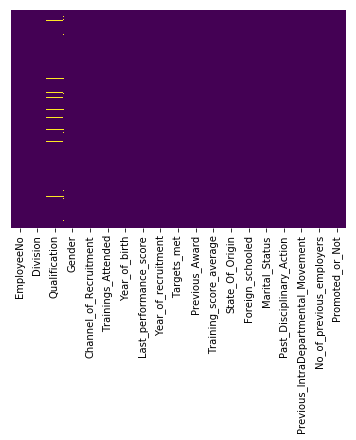

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis') #Checking for missing values

In [ ]:
sns.set_style('whitegrid')  #Set style i want to use

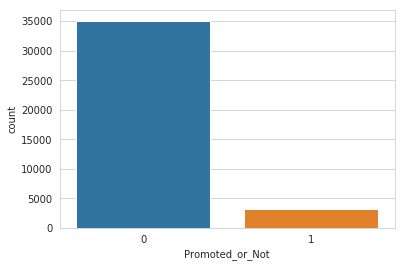

In [ ]:
sns.countplot('Promoted_or_Not', data=train)   #Count of people prompted or not from here we see that this dataset is very unbalanced 

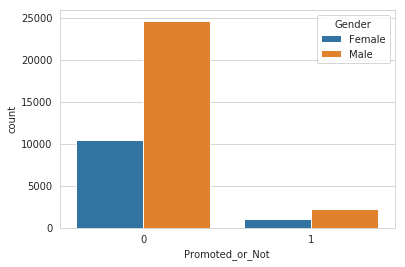

In [ ]:
sns.countplot('Promoted_or_Not',hue='Gender', data=train) 

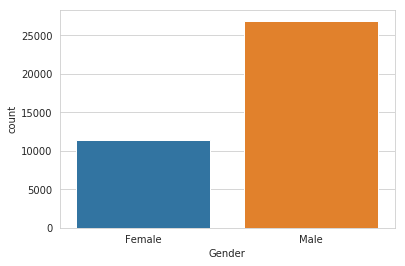

In [ ]:
sns.countplot('Gender', data=train) #From here we see that we have more males in the dataset

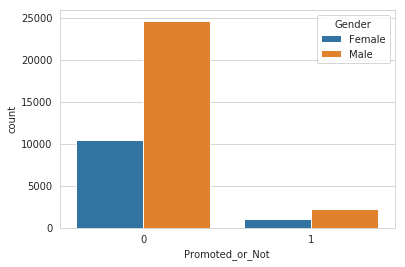

In [ ]:
sns.countplot('Promoted_or_Not',hue='Gender', data=train)  #Checking in ratio to a categorical variable Gender

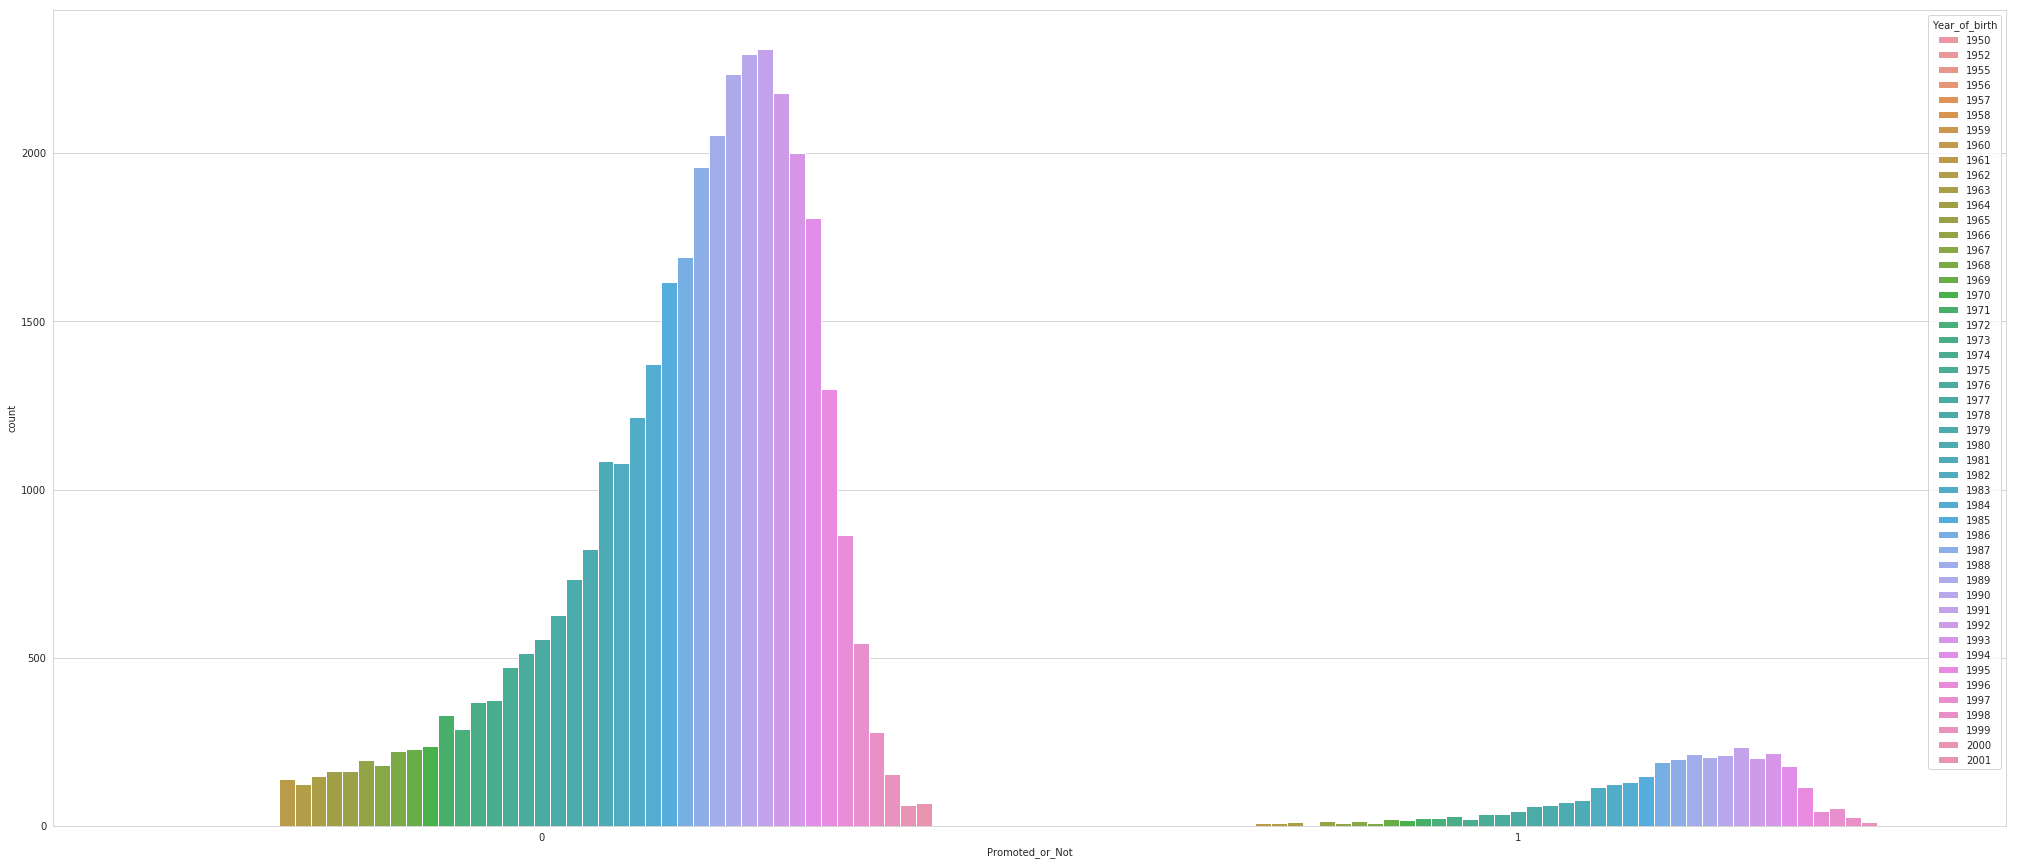

In [ ]:
plt.figure(figsize = (35,15))
sns.countplot('Promoted_or_Not',hue='Year_of_birth', data=train)   ##Checking in ratio to a categorical variable Year_of_birth

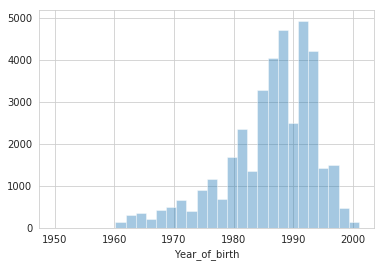

In [ ]:
sns.distplot(train['Year_of_birth'],kde=False,bins=30) #to see which year had the most disribution

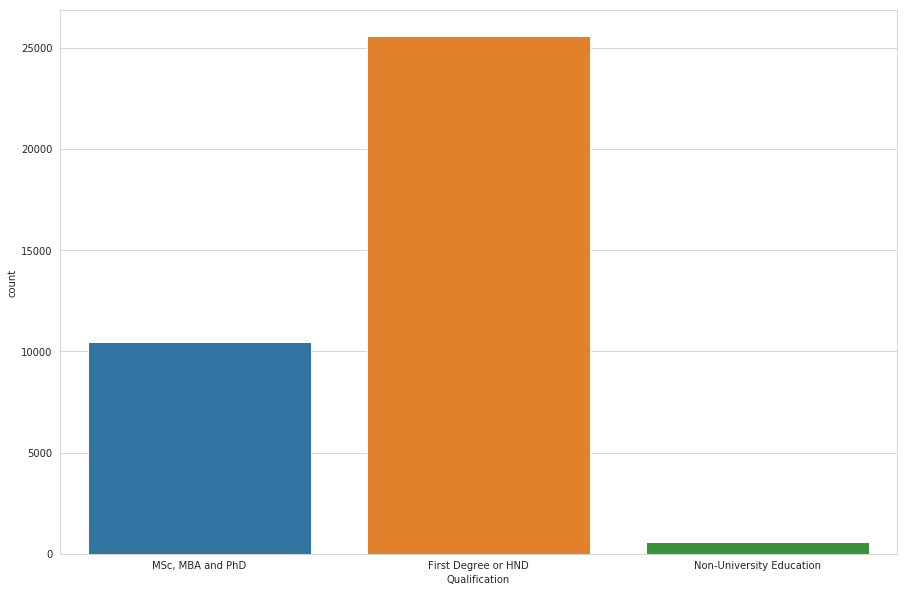

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x='Qualification',data=train)

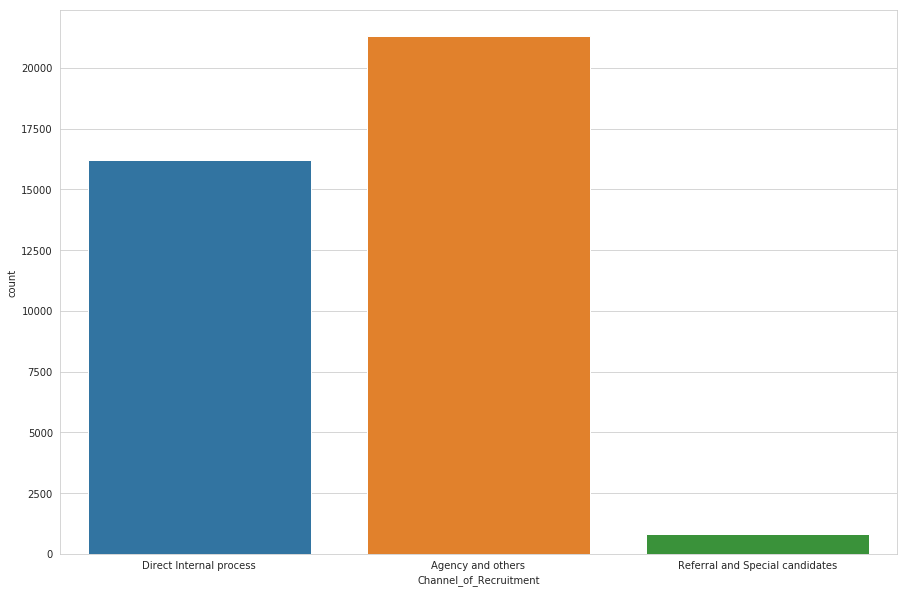

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x='Channel_of_Recruitment',data=train)

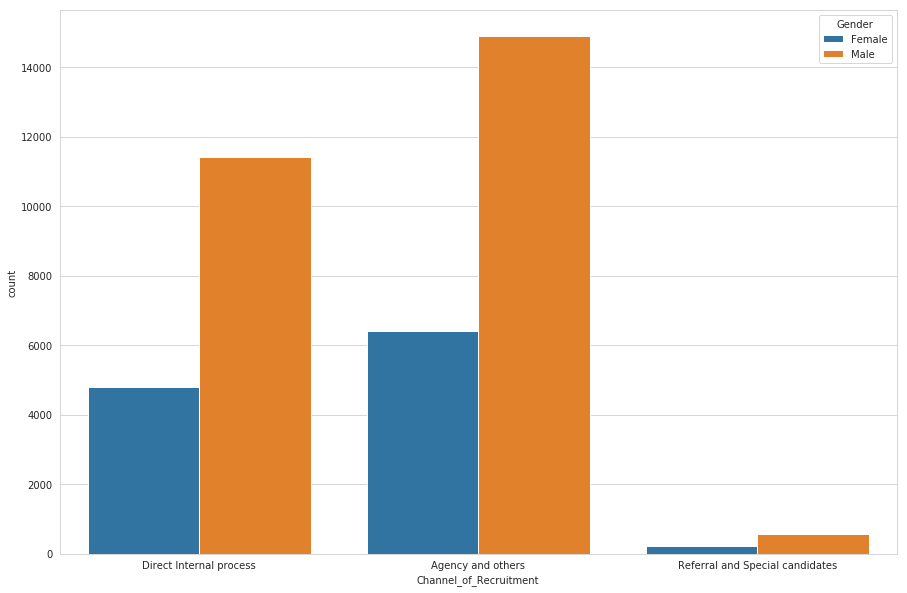

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x='Channel_of_Recruitment',hue='Gender',data=train)

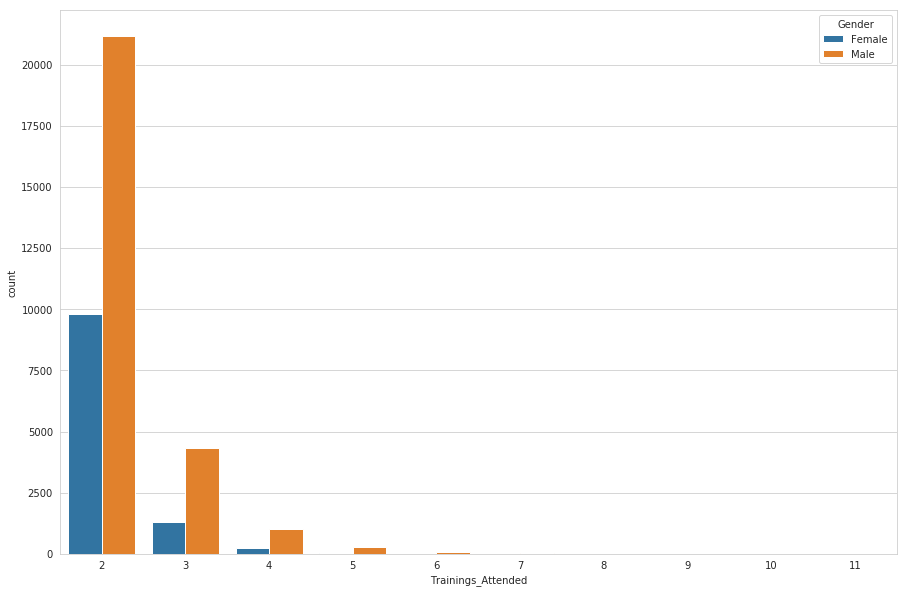

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x='Trainings_Attended',hue='Gender', data=train)

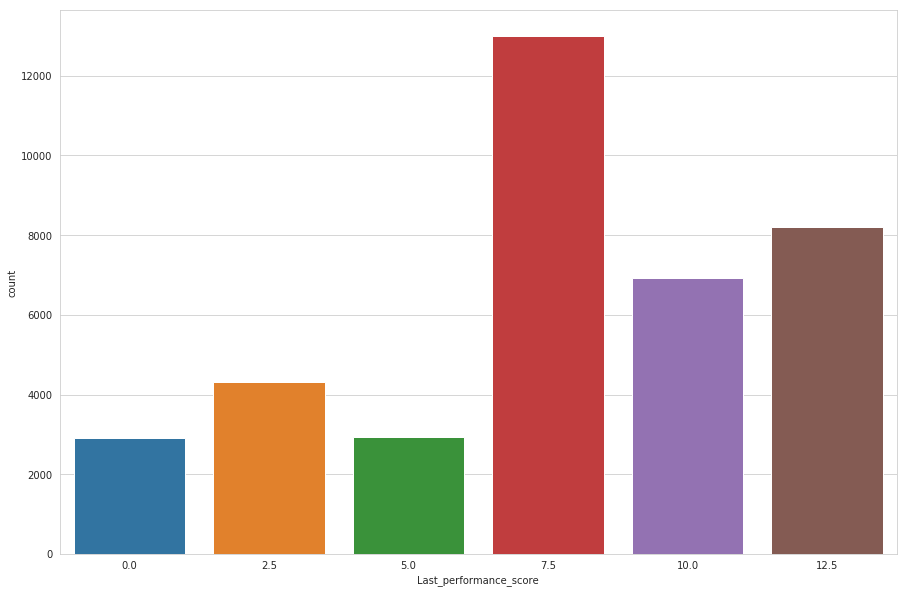

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x='Last_performance_score',data=train)

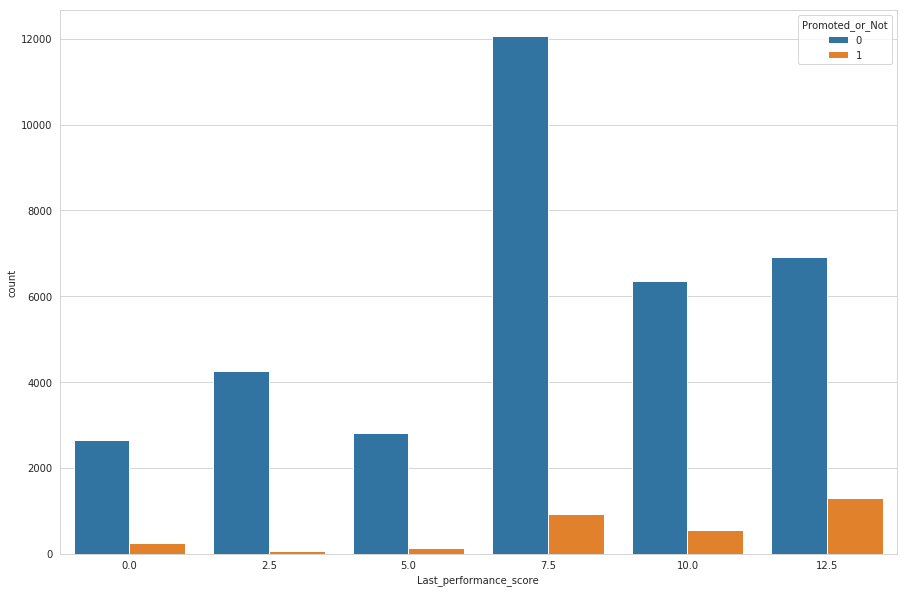

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x='Last_performance_score', hue = 'Promoted_or_Not',data=train)

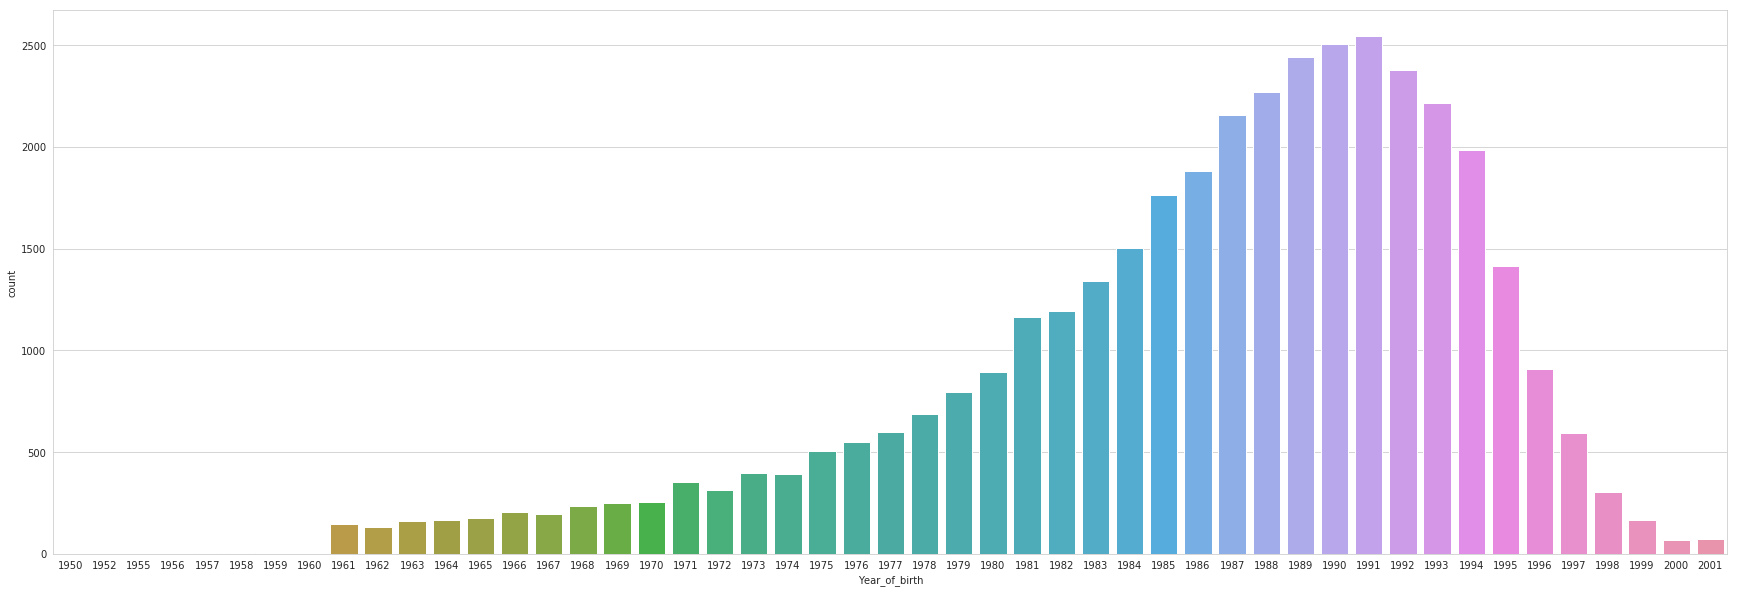

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x='Year_of_birth',data=train)

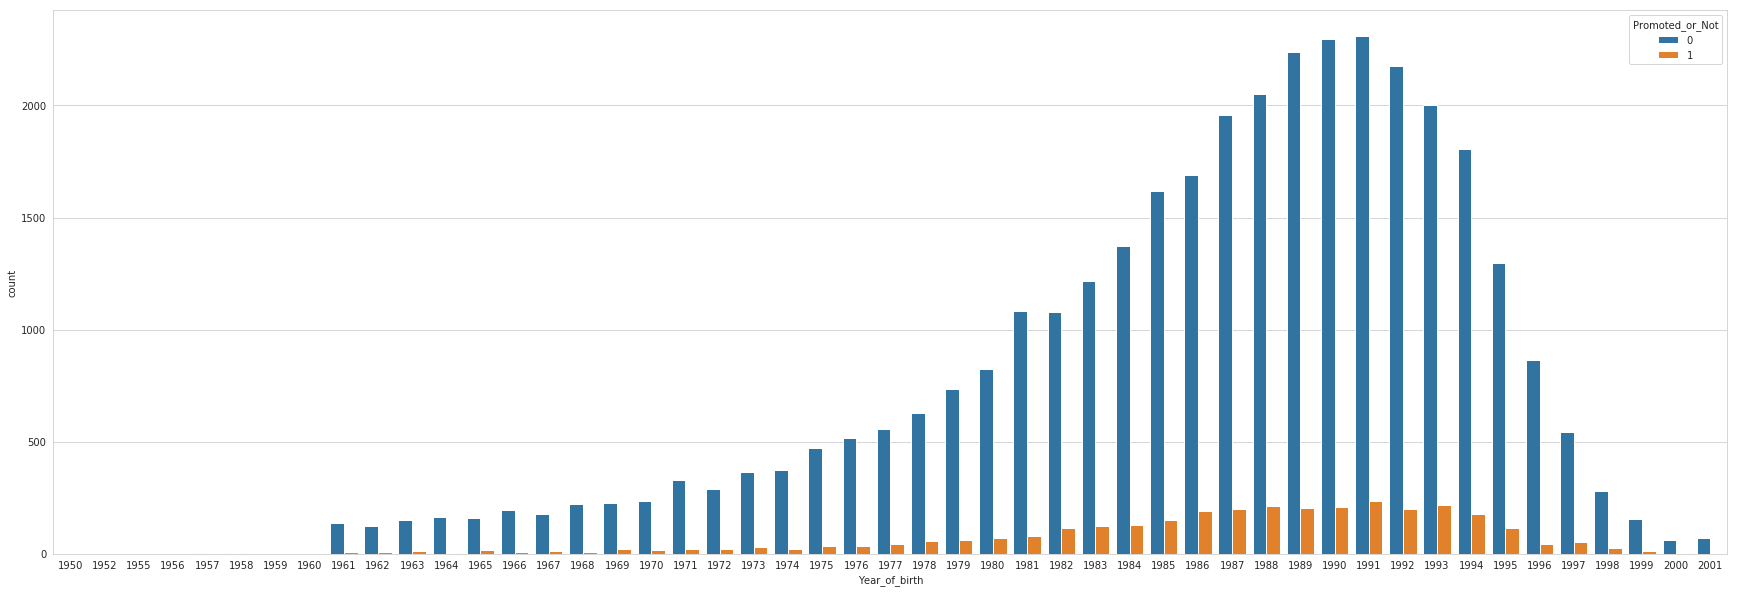

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x='Year_of_birth', hue = 'Promoted_or_Not', data=train)

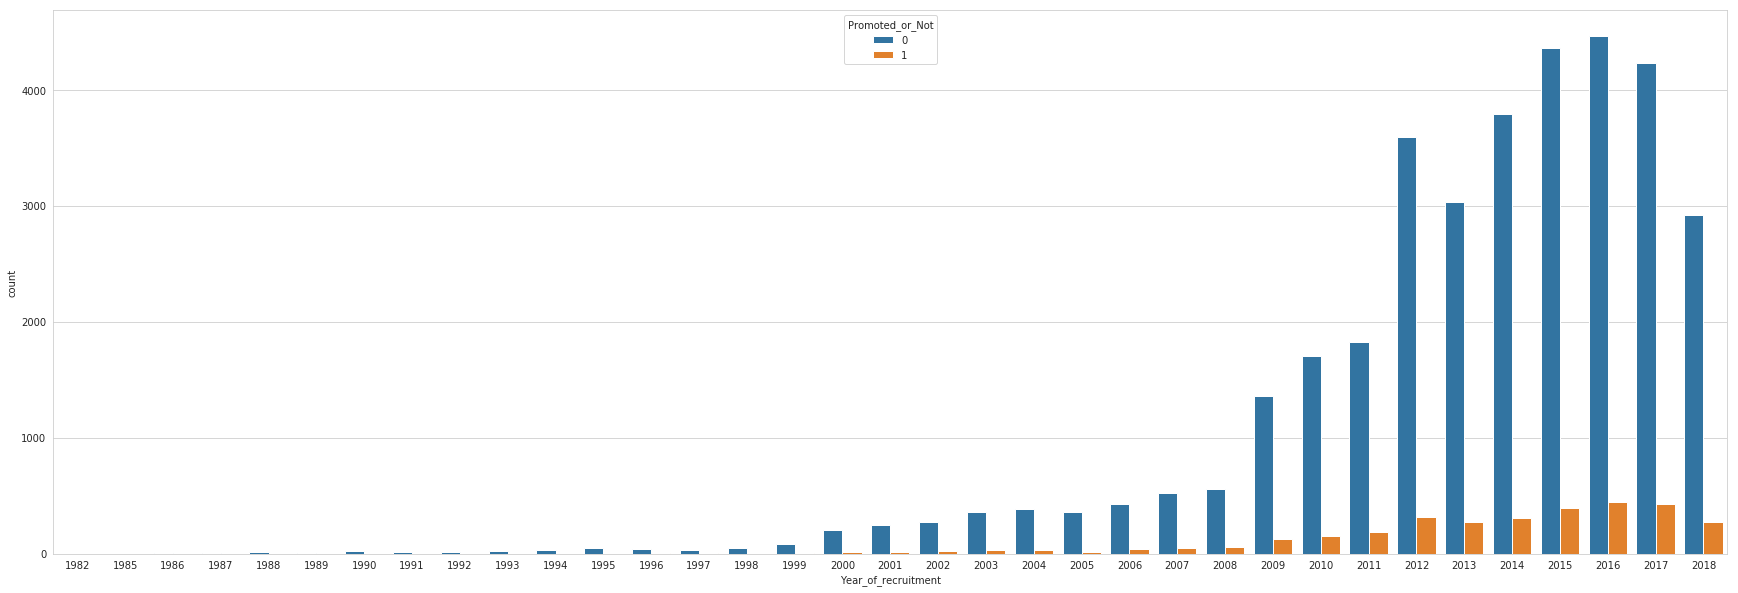

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x='Year_of_recruitment',hue='Promoted_or_Not' ,data=train)

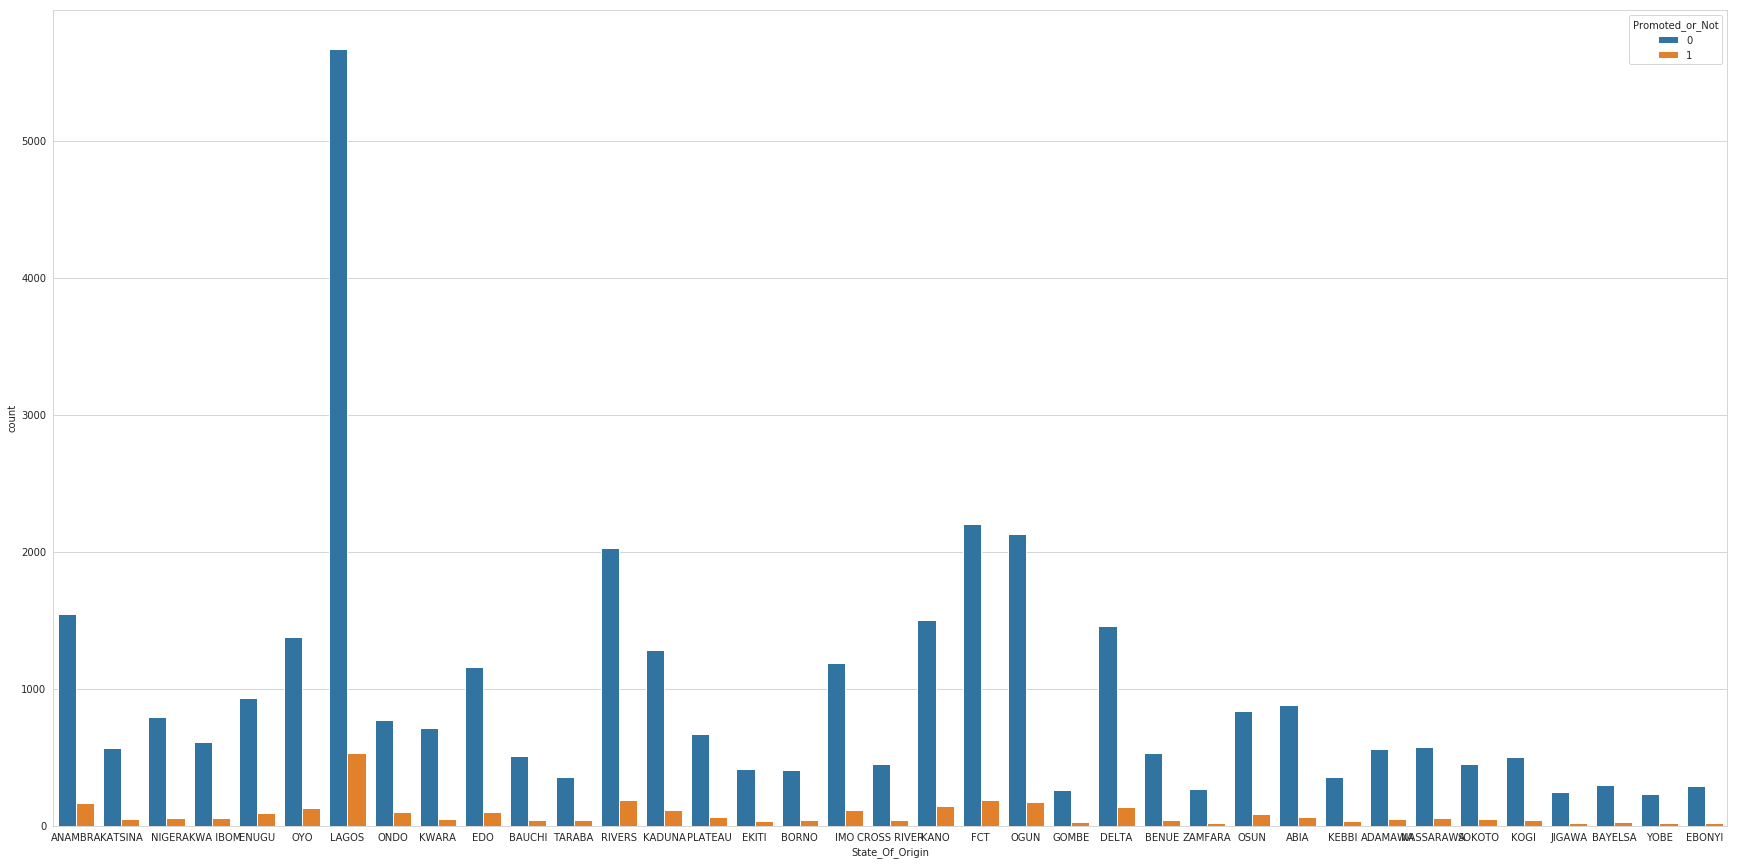

In [ ]:
plt.figure(figsize = (30,15))
sns.countplot(x='State_Of_Origin',hue = 'Promoted_or_Not', data=train)

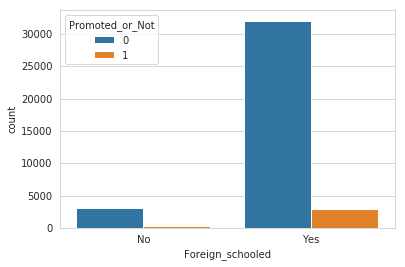

In [ ]:
sns.countplot(x='Foreign_schooled',hue = 'Promoted_or_Not', data=train)

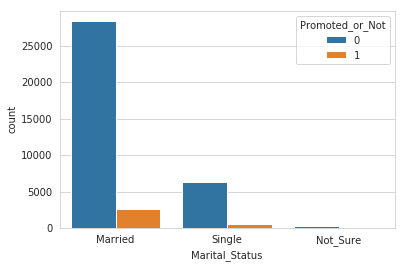

In [ ]:
sns.countplot(x='Marital_Status',hue = 'Promoted_or_Not', data=train)

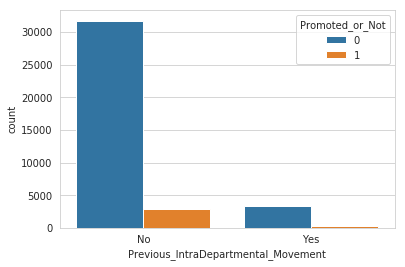

In [ ]:
sns.countplot(x='Previous_IntraDepartmental_Movement',hue = 'Promoted_or_Not',data=train)

In [ ]:
train_categorical = train.select_dtypes(include=['object'])   #Checking for Categorical Variables
train_categorical.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,ANAMBRA,No,Married,No,No,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,ANAMBRA,Yes,Married,No,No,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,KATSINA,Yes,Married,No,No,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,NIGER,Yes,Single,No,No,1
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,AKWA IBOM,Yes,Married,No,No,1


In [ ]:
train_categoricaldummies = pd.get_dummies(train_categorical,columns = [ 'Division', 'Qualification', 'Gender','Channel_of_Recruitment', 'Foreign_schooled',
       'Marital_Status', 'No_of_previous_employers'],drop_first = True)      #Getting dummies for variables i wan towork with

In [ ]:
train_categoricaldummies.head()

,EmployeeNo,State_Of_Origin,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,"Qualification_MSc, MBA and PhD",Qualification_Non-University Education,Gender_Male,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Foreign_schooled_Yes,Marital_Status_Not_Sure,Marital_Status_Single,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,YAK/S/00001,ANAMBRA,No,No,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,YAK/S/00002,ANAMBRA,No,No,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,YAK/S/00003,KATSINA,No,No,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
3,YAK/S/00004,NIGER,No,No,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0
4,YAK/S/00006,AKWA IBOM,No,No,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0


In [ ]:
train_categoricaldummiesnew=train_categoricaldummies.drop(['EmployeeNo','Past_Disciplinary_Action',	'Previous_IntraDepartmental_Movement','State_Of_Origin'],axis=1)
#Dropping variables

In [ ]:
train_categoricaldummiesnew.head()

,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,"Qualification_MSc, MBA and PhD",Qualification_Non-University Education,Gender_Male,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Foreign_schooled_Yes,Marital_Status_Not_Sure,Marital_Status_Single,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0


In [ ]:
Train = train.drop(['EmployeeNo', 'Division', 'Qualification', 'Gender','Channel_of_Recruitment', 'State_Of_Origin', 'Foreign_schooled',
       'Marital_Status', 'Past_Disciplinary_Action','Previous_IntraDepartmental_Movement', 'No_of_previous_employers','Trainings_Attended',	'Year_of_birth', 'Year_of_recruitment', 'Targets_met',	'Previous_Award'],axis=1)
#Dropping variables from train

In [ ]:
Train.head()

,Last_performance_score,Training_score_average,Promoted_or_Not
0,12.5,41,0
1,12.5,52,0
2,7.5,42,0
3,2.5,42,0
4,7.5,77,0


In [ ]:
Train2 = pd.concat([Train,train_categoricaldummiesnew],axis=1)
Train2.head()

,Last_performance_score,Training_score_average,Promoted_or_Not,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,"Qualification_MSc, MBA and PhD",Qualification_Non-University Education,Gender_Male,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Foreign_schooled_Yes,Marital_Status_Not_Sure,Marital_Status_Single,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,12.5,41,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,12.5,52,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,7.5,42,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
3,2.5,42,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0
4,7.5,77,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0


In [ ]:
X = Train2.drop('Promoted_or_Not',axis=1)
y = Train2['Promoted_or_Not']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
seed = 5
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
#import XGBoost classifier and accuracy
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = XGBClassifier(learning_rate = 0.3, n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 93.74%


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.94148341 0.94483787 0.93812896 0.94369873 0.93810589 0.94255875
 0.94181276 0.94181276 0.93659082 0.94032078]
Mean: 0.9409350725435305
Standard Deviation: 0.0024995133505269097


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

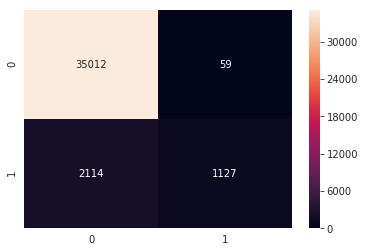

In [ ]:
y_predict = model.predict(X)
cm = confusion_matrix(y, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35071
           1       0.95      0.35      0.51      3241

    accuracy                           0.94     38312
   macro avg       0.95      0.67      0.74     38312
weighted avg       0.94      0.94      0.93     38312



WORKING WITH TEST DATASET

In [ ]:
test_categorical = test.select_dtypes(include=['object'])
test_categorical.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,FCT,Yes,Married,No,No,0


In [ ]:
test_categoricaldummies = pd.get_dummies(test_categorical,columns = [ 'Division', 'Qualification', 'Gender','Channel_of_Recruitment', 'Foreign_schooled',
       'Marital_Status', 'No_of_previous_employers'],drop_first = True)

In [ ]:
test_categoricaldummies.head()

,EmployeeNo,State_Of_Origin,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,"Qualification_MSc, MBA and PhD",Qualification_Non-University Education,Gender_Male,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Foreign_schooled_Yes,Marital_Status_Not_Sure,Marital_Status_Single,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,YAK/S/00005,FCT,No,No,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,YAK/S/00011,OGUN,No,No,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0
2,YAK/S/00015,KANO,No,No,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0
3,YAK/S/00016,RIVERS,No,No,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
4,YAK/S/00017,FCT,No,No,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
test_categoricaldummiesnew=test_categoricaldummies.drop(['EmployeeNo','Past_Disciplinary_Action',	'Previous_IntraDepartmental_Movement','State_Of_Origin'],axis=1)

In [ ]:
test_categoricaldummiesnew.head()

,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,"Qualification_MSc, MBA and PhD",Qualification_Non-University Education,Gender_Male,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Foreign_schooled_Yes,Marital_Status_Not_Sure,Marital_Status_Single,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
Test = test.drop(['EmployeeNo', 'Division', 'Qualification', 'Gender','Channel_of_Recruitment', 'State_Of_Origin', 'Foreign_schooled',
       'Marital_Status', 'Past_Disciplinary_Action','Previous_IntraDepartmental_Movement', 'No_of_previous_employers','Trainings_Attended',	'Year_of_birth', 'Year_of_recruitment', 'Targets_met',	'Previous_Award'],axis=1)

In [ ]:
Test.head()

,Last_performance_score,Training_score_average
0,7.5,65
1,0.0,69
2,7.5,76
3,2.5,52
4,7.5,69


In [ ]:
Test2 = pd.concat([Test,test_categoricaldummiesnew],axis=1)
Test2.head()

,Last_performance_score,Training_score_average,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,"Qualification_MSc, MBA and PhD",Qualification_Non-University Education,Gender_Male,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Foreign_schooled_Yes,Marital_Status_Not_Sure,Marital_Status_Single,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,7.5,65,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,0.0,69,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0
2,7.5,76,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0
3,2.5,52,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
4,7.5,69,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
y_pred = model.predict(Test2)
predictions = [round(value) for value in y_pred]

In [ ]:
y_pred.shape

(16496,)

In [ ]:
submission = pd.DataFrame({"EmployeeNo": test["EmployeeNo"],

"Promoted_or_Not": predictions

})

submission.to_csv('staffpromotion.csv', index = False)